In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Histogram Equalization 

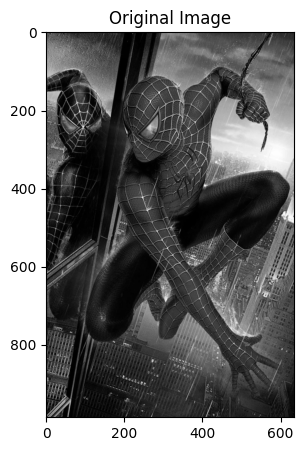

In [25]:
image = cv2.imread('spiderman.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.show()

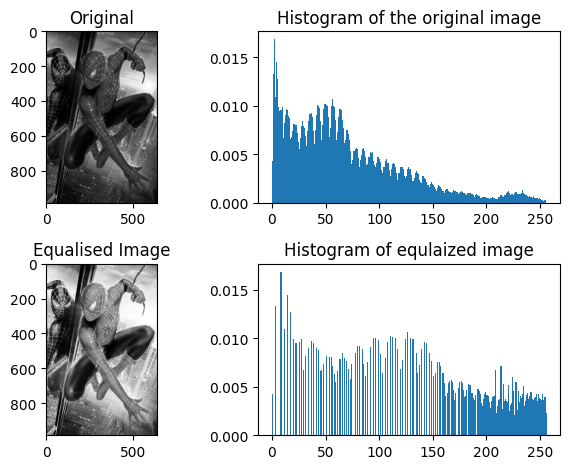

In [27]:
#generating the equalized image
equ = cv2.equalizeHist(image)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original')

plt.subplot(2,2,2)
plt.hist(image.ravel(),bins=256,range=(0,256),density=True)
plt.title('Histogram of the original image')

plt.subplot(2,2,3)
plt.imshow(equ,cmap='gray')
plt.title('Equalised Image')

plt.subplot(2,2,4)
plt.hist(equ.ravel(),bins=256,range=(0,256),density=True)
plt.title('Histogram of equlaized image')

plt.tight_layout()
plt.show()

Histogram Specification

Text(0.5, 1.0, 'Source Image')

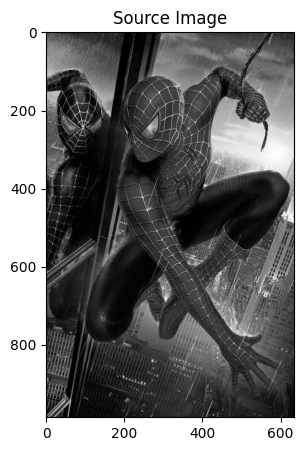

In [41]:
source_image = cv2.imread('spiderman.jpg')
source_image = cv2.cvtColor(source_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(source_image,cmap='gray')
plt.title("Source Image")



Text(0.5, 1.0, 'Histogram of source image')

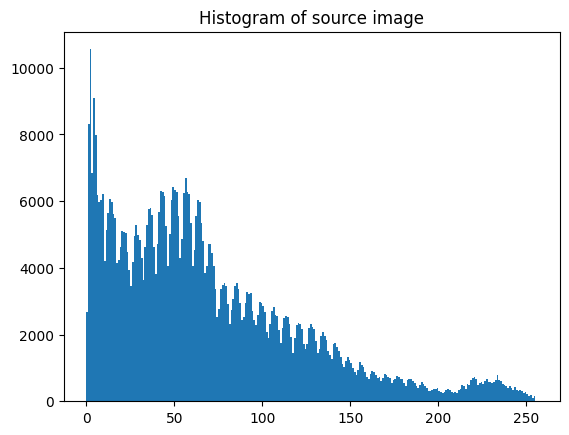

In [42]:
plt.hist(source_image.ravel(),bins=256,range=(0,256))
plt.title("Histogram of source image")


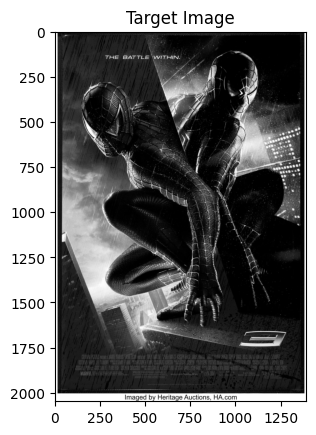

In [45]:
target_image = cv2.imread('spidey.jpg')
target_image = cv2.cvtColor(target_image,cv2.COLOR_BGR2GRAY)
plt.imshow(target_image,cmap='gray')
plt.title("Target Image")
plt.show()

Text(0.5, 1.0, 'Target image')

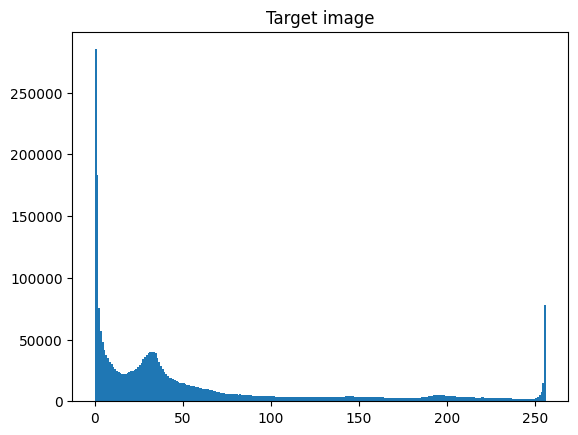

In [47]:
plt.hist(target_image.ravel(),bins=256,range=(0,256))
plt.title("Target image")

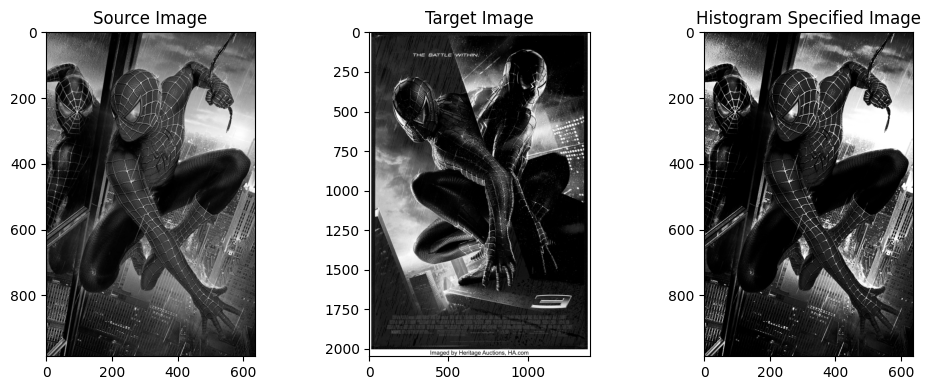

In [50]:

# Calculate histograms and CDFs
source_hist, _ = np.histogram(source_image.flatten(), bins=256, range=(0, 256))
target_hist, _ = np.histogram(target_image.flatten(), bins=256, range=(0, 256))
source_cdf = np.cumsum(source_hist) / np.sum(source_hist)
target_cdf = np.cumsum(target_hist) / np.sum(target_hist)

# Map pixel values
mapping = np.interp(source_cdf, target_cdf, np.arange(256))
specified_image = mapping[source_image]

# Display images
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(source_image, cmap='gray')
plt.title('Source Image')

plt.subplot(132)
plt.imshow(target_image, cmap='gray')
plt.title('Target Image')

plt.subplot(133)
plt.imshow(specified_image, cmap='gray')
plt.title('Histogram Specified Image')

plt.tight_layout()
plt.show()